# Проект по проверке гипотез

### Цель проекта : 
- посчитать нескольких продуктовых метрик

- посмотреть, какие распределения могут встретиться на практике.


Имеются следующие данные в таблице:

- ad_id – идентификатор объявления (рекламы)
- xyz_campaign_id – идентификатор рекламной кампании в базе компании X
- fb_campaign_id – идентификатор кампании в Facebook
- age – возрастная группа, которой показывалась реклама
- gender – пол тех, кому показывалась реклама
- interest – код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
- impressions – число показов
- clicks – число кликов
- spent – сумма, которую компания потратила на показ объявления 
- total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
- approved_conversion – количество людей, которые купили продукт после просмотра рекламы


В данном проекты я отвечу на следующие вопросы: 

1. Загружу данные, проверю число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

2. Построю график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

3. Создам новую колонку c CTR. Посмотрю на описательные статистики и распределение.

4. Проанализирую CTR с разбивкой по рекламной кампании.

5. Посчитаю стоимость за клик пользователя по объявлению (CPC). Изучу полученные значения, используя меры центральной тенденции и меры изменчивости. 

6. Визуализирую CPC с разбивкой по полу пользователей, которым были показаны объявления. 
 
7. Посчитаю конверсию из клика в покупку.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss


### 1. Загрузка и изучение данных

In [2]:
# считываем данные, смотрим их характеристики через метод info()

df = pd.read_csv('/Users/oksana_khoroshun/Documents/Python/conversion.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [3]:
#смотрим первые 5 строк

df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


В данных отсутствуют пропущенные значения. Проверим, сколько уникальных рекламных кампаний было проведено. 

In [4]:
# используем метод value_counts()

df.xyz_campaign_id.value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

Итак, было проведено 3 рекламные компании.


In [5]:
# переводём названия стобцов в нижный регистр

df.columns = [x.lower() for x in df.columns]

df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


### 2. Построение графика распределения числа показов (impressions) для каждой рекламы

Далее построим график распределения числа показов для каждой рекламной кампании в Facebook, прологарифмировав значения. 


In [6]:
# группируем данные по переменной 'fb_campaign_id', далее считаем число показов

campaign_id = df.groupby('fb_campaign_id', as_index=False) \
                .agg({'impressions': 'sum'})


In [7]:
# для построения графика прологарифмируем значения

campaign_id.fb_campaign_id = np.log(campaign_id.impressions)

In [8]:
campaign_id

,fb_campaign_id,impressions
0,8.902456,7350
1,9.790375,17861
2,6.541030,693
3,9.035034,8392
4,7.557473,1915
...,...,...
686,13.937527,1129773
687,13.365386,637549
688,11.928546,151531
689,13.580108,790253


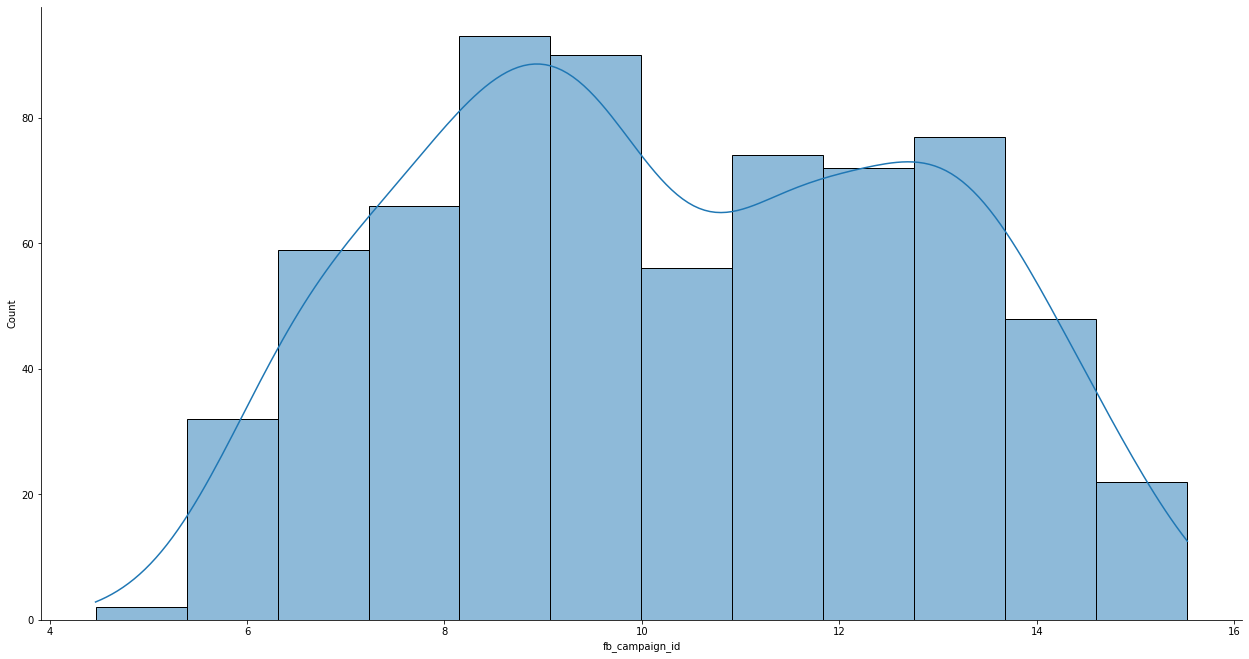

In [9]:
g = sns.displot(data=campaign_id,
            x='fb_campaign_id',
            kde=True)

g.figure.set_figwidth(20)
g.figure.set_figheight(10)

Из полученного графика я вижу, что распределение числа показов для каждой рекламной кампании в Facebook является 
бимодальным и не являемся нормальным.


### 3. Создание новой колонки c CTR. Описательные статистики и распределение по CTR

Метрика CTR (click-through rate) показывает кликабельность, то есть отношение числа кликов к количеству  показов:


$$
CTR = \frac {clicks}{impressions}
$$
 

In [10]:
# созданим новый столбец с рассчитанным CTR

df['ctr'] = df.clicks / df.impressions

In [11]:
# посмотрим наибольший CTR

df.ctr.max()

0.001059322033898305

In [12]:
# теперь найдем ad_id объявления с наибольшим CTR

df[df.ctr == 0.001059322033898305]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


### 4. Aнализ CTR с разбивкой по рекламной кампании

Далее я визуализирую CTR с разбивкой по рекламной кампании №916

In [13]:
# отсортируем данные для рекламной компании №916

campaign_id_916 = df[df.xyz_campaign_id == 916]

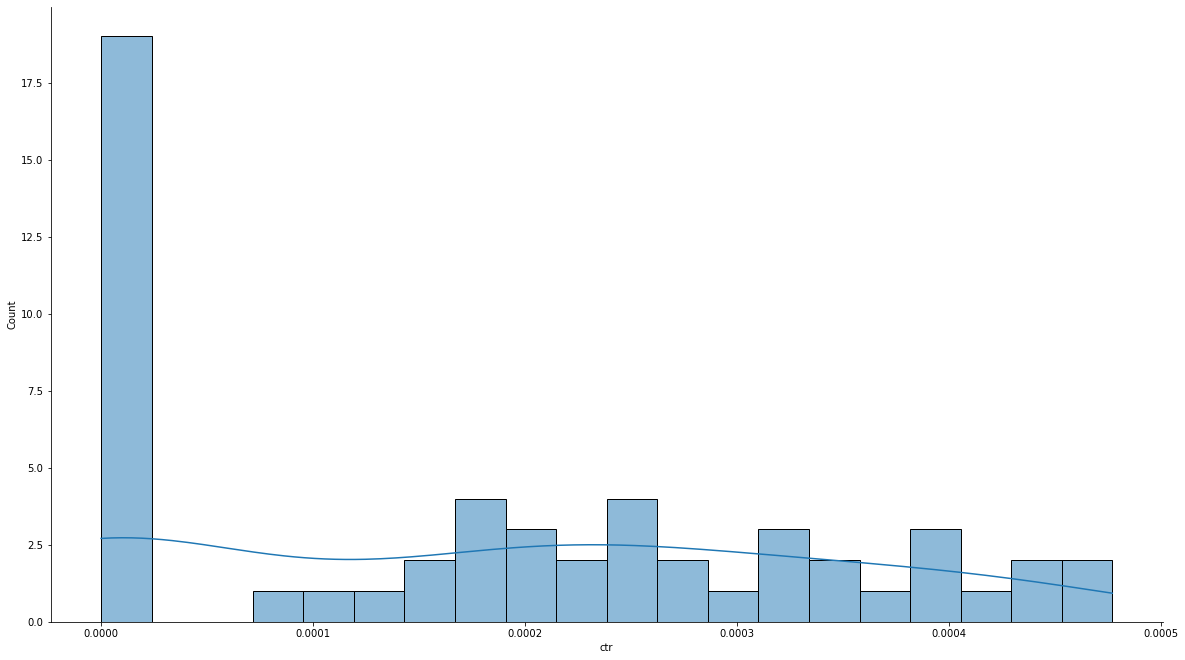

In [14]:
# строим график

g = sns.displot(data=campaign_id_916,
            x='ctr',
            bins=20,
            kde=True)

g.figure.set_figwidth(20)
g.figure.set_figheight(10)

### 5. Создание новой колонки c CPC. Анализ CPC с использованием мер центральной тенденции и меры изменчивости.

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. 

Рассчитывается путём деления суммы потраченных денег на общее число кликов:

$$
CPC = \frac {spent}{clicks}
$$

In [15]:
# создадим новый столбец с рассчитанным CPC

df['cpc'] = df.spent / df.clicks

In [16]:
# выведем описательные статистики для CPC

df.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [17]:
# удалим пропущенные значения в колонке cpc

cpc_without_nan = df.cpc.dropna()

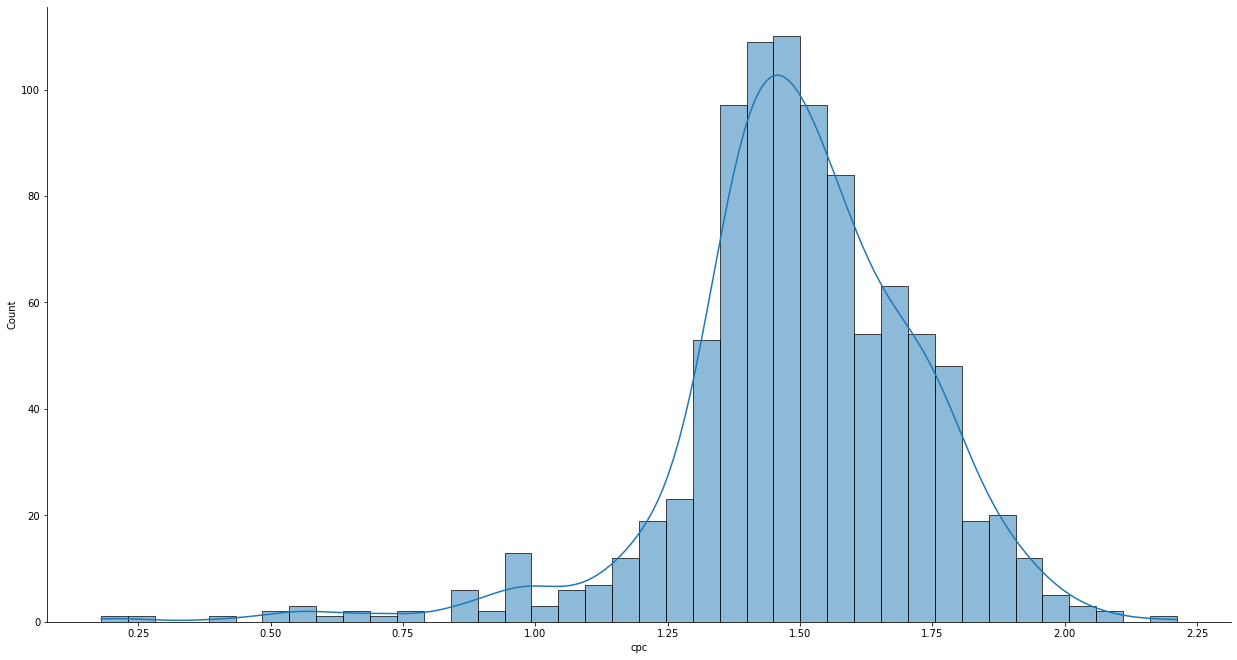

In [18]:
# построим график, чтобы посмотреть форму распределения данных cpc

g = sns.displot(data=cpc_without_nan, kde=True)

g.figure.set_figwidth(20)
g.figure.set_figheight(10)

Из полученного графика я вижу, что распределение стоимости за клик пользователя по объявлению является 
унимодальным и нормальным.

In [19]:
# чтобы найти межквартильный размах, будем использовать iqr из scipy

ss.iqr(df.cpc, nan_policy='omit')

0.2543636990499998

### 6. Визуализация CPC с разбивкой по полу пользователей, которым были показаны объявления



In [20]:
# отберем данные для построения графика

data_for_visual = df[['gender', 'cpc']]

In [21]:
# удалим пропущенные значения

data_for_visual = data_for_visual.dropna()

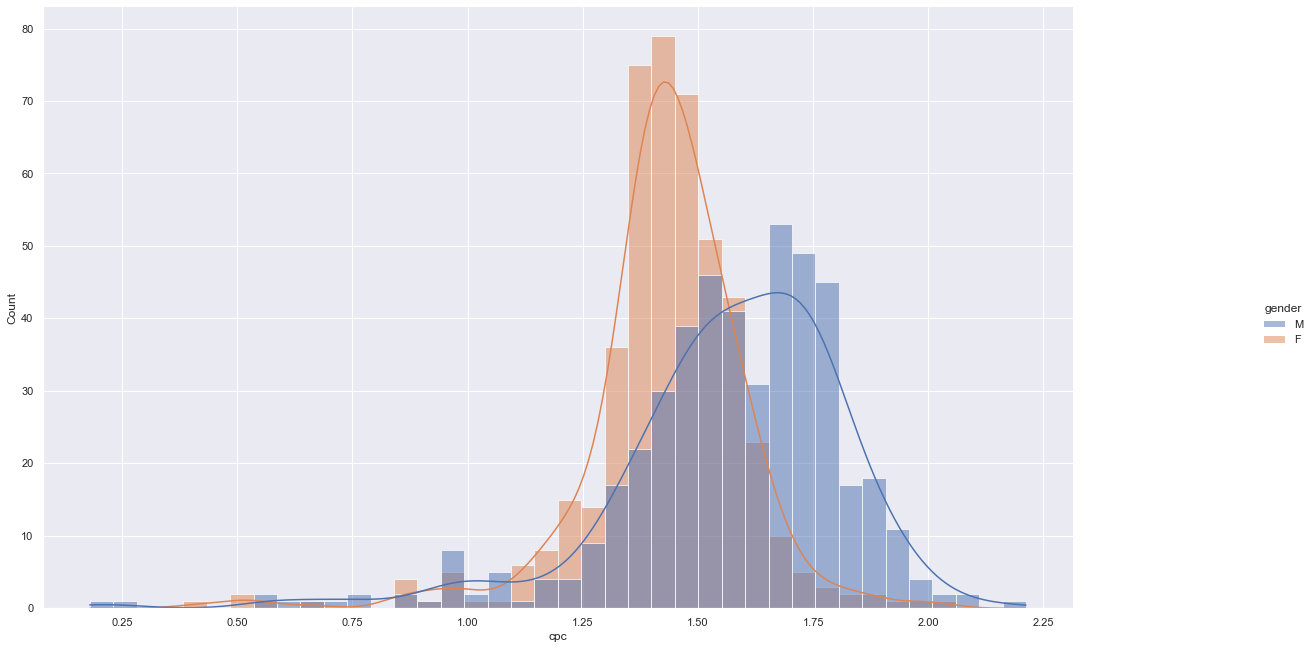

In [22]:
# Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления

sns.set_theme()
g = sns.displot(data=data_for_visual, x='cpc',hue='gender', kde=True)

g.figure.set_figwidth(20)
g.figure.set_figheight(10)

Исходя из графика можно сделать вывод об отношении стоимости клика к количеству сделанных за эти деньги кликов с разбивкой по полу: женщины чаще кликают рекламные объявления с меньшей стоимостью, в свою очередь мужчины кликают более "дорогие" объявления.


### 7. Расчет конверсии из клика в покупку

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

$$
conversion = \frac {approved conversion}{clicks}
$$


In [23]:
# Рассчитаем конверсию из клика в покупку.

df['conversion'] = round(df.approved_conversion / df.clicks * 100, 2)

In [24]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc,conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,100.00
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.00
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.00
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.79
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.00
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.00
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000171,1.471926,1.48


In [25]:
# посмотрим конверсию для объявления 1121814 

df[df.ad_id == 1121814]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc,conversion
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,3.09


Конверсия для объявления 1121814 равна 3.09%



## Заключение 

В этом проекте я изучала проверку гипотез, посчитала несколько продуктовых метрик и посмотрела на их распределения:

1. Построила график распределения числа показов для каждой рекламной кампании в Facebook и увидела, что это распределение является бимодальным и не являемся нормальным.

2. Посчитала метрику CTR (click-through rate) и выяснила наивысший ее показатель

3. Визуализировала CTR с разбивкой по рекламной кампании №916

4. Посчитала CPC (cost-per-click), изучила ее описательную статистику и выяснила межквартильный размах

5. Визуализировала CPC с разбивкой по полу пользователей, которым были показаны объявления и увидела, что женщины чаще кликают рекламные объявления с меньшей стоимостью, в свою очередь мужчины кликают более "дорогие" объявления

6. Посчитала конверсию из клика в покупку
